ffmpeg 라이브러리는 리눅스 환경에서 sound 및 video 실행 및 분석에 매우 유용하다.

일반적으로 pip install ffmpeg로 설치하면 리눅스 환경에는 적용 되지만 파이썬에는 적용이 안됨.

pip install ffmpeg-python으로 설치하거나 본인처럼 가상환경에서는 conda install ffmpeg-python

으로 설치해도 무방하다. 가상환경의 경우 conda명령어를 추천한다.

In [1]:
import os
import librosa
import librosa.display
import ffmpeg
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)

    """
    plt.figure(figsize=(12, 8))

    D = librosa.amplitude_to_db(np.abs(librosa.stft(X)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Linear-frequency power spectrogram')
    
    # Or on a logarithmic scale
    
    plt.subplot(4, 2, 2)
    librosa.display.specshow(D, y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-frequency power spectrogram')
    
    # Or use a CQT scale
    
    CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(X, sr=sr)), ref=np.max)
    plt.subplot(4, 2, 3)
    librosa.display.specshow(CQT, y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Constant-Q power spectrogram (note)')
    
    plt.subplot(4, 2, 4)
    librosa.display.specshow(CQT, y_axis='cqt_hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Constant-Q power spectrogram (Hz)')
    
    # Draw a chromagram with pitch classes
    
    C = librosa.feature.chroma_cqt(X=X, sr=sr)
    plt.subplot(4, 2, 5)
    librosa.display.specshow(C, y_axis='chroma')
    plt.colorbar()
    plt.title('Chromagram')
    
    # Force a grayscale colormap (white -> black)
    
    plt.subplot(4, 2, 6)
    librosa.display.specshow(D, cmap='gray_r', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Linear power spectrogram (grayscale)')
    
    # Draw time markers automatically
    
    plt.subplot(4, 2, 7)
    librosa.display.specshow(D, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log power spectrogram')
    
    # Draw a tempogram with BPM markers
    
    plt.subplot(4, 2, 8)
    Tgram = librosa.feature.tempogram(X=X, sr=sr)
    librosa.display.specshow(Tgram, x_axis='time', y_axis='tempo')
    plt.colorbar()
    plt.title('Tempogram')
    plt.tight_layout()
    plt.show()
    
    # Draw beat-synchronous chroma in natural time
    
    plt.figure()
    tempo, beat_f = librosa.beat.beat_track(X=X, sr=sr, trim=False)
    beat_f = librosa.util.fix_frames(beat_f, x_max=C.shape[1])
    Csync = librosa.util.sync(C, beat_f, aggregate=np.median)
    beat_t = librosa.frames_to_time(beat_f, sr=sr)
    ax1 = plt.subplot(2,1,1)
    librosa.display.specshow(C, y_axis='chroma', x_axis='time')
    plt.title('Chroma (linear time)')
    ax2 = plt.subplot(2,1,2, sharex=ax1)
    librosa.display.specshow(Csync, y_axis='chroma', x_axis='time',
                             x_coords=beat_t)
    plt.title('Chroma (beat time)')
    plt.tight_layout()
    plt.show()
    """
    
    return mfccs,chroma,mel,contrast,tonnetz

In [3]:
def parse_audio_files(filenames):
    rows = len(filenames)
    features, labels, groups = np.zeros((rows,193)), np.zeros((rows,3)), np.zeros((rows, 1))
    i = 0
    for fn in filenames:
        try:
            mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            y_col = int(fn.split('/')[3].split('-')[1])
            group = int(fn.split('/')[3].split('-')[0])
        except:
            print(fn)
        else:
            features[i] = ext_features
            labels[i, y_col] = 1
            groups[i] = group
            i += 1
    return features, labels, groups

In [4]:
audio_files = []
for i in range(1,11):
    audio_files.extend(glob.glob('/home/monn/3/fold%d/*.wav' % i))

In [5]:
print(len(audio_files))
for i in range(9):
    files = audio_files[i*4800: (i+1)*4800]
    X, y, groups = parse_audio_files(files)
    for r in y:
        if np.sum(r) > 1.5:
            print('error occured')
            break
    np.savez('urban_sound_%d' % i, X=X, y=y, groups=groups)

12


/home/monn/anaconda3/envs/356/lib/python3.5/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


/home/monn/3/fold1/1234-0-0-1.wav
/home/monn/3/fold1/1234-0-0-2.wav
/home/monn/3/fold1/1234-0-0-0.wav
/home/monn/3/fold2/1235-1-0-1.wav
/home/monn/3/fold2/1235-1-0-2.wav
/home/monn/3/fold2/1235-1-0-0.wav
/home/monn/3/fold3/6988-3-0-2.wav
/home/monn/3/fold3/6988-3-0-0.wav
/home/monn/3/fold3/6988-3-0-1.wav
/home/monn/3/fold4/1234-0-0-1.wav
/home/monn/3/fold4/1234-0-0-2.wav
/home/monn/3/fold4/1234-0-0-0.wav


In [6]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [7]:
frame_length = 1050
frame_stride = 10

Text(0.5,1,'Log-frequency power spectrogram')

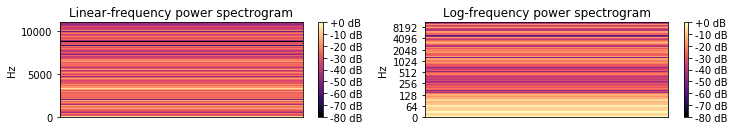

In [8]:
import matplotlib.pyplot as plt
y, sr = librosa.load('/home/monn/3/fold4/1234-0-0-0.wav')
plt.figure(figsize=(12, 8))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

plt.subplot(4, 2, 2)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

Text(0.5,1,'Stereo')

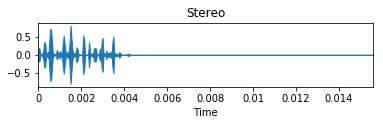

In [9]:
y, sr = librosa.load(('/home/monn/3/fold4/1234-0-0-0.wav'),
                     mono=False, duration=10)
plt.subplot(3, 1, 2)
librosa.display.waveplot(y, sr=sr)
plt.title('Stereo')

Text(0.5,1,'Monophonic')

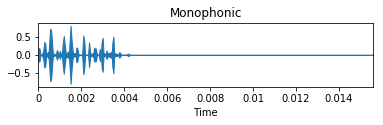

In [10]:
y, sr = librosa.load(('/home/monn/3/fold4/1234-0-0-0.wav'), duration=10)
plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic')

Text(0.5,1,'Stereo')

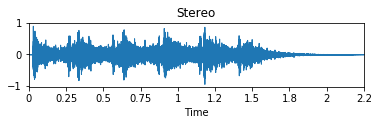

In [11]:
y, sr = librosa.load(('/home/monn/Sound-Data/fold1/7061-6-0-0.wav'),
                     mono=False, duration=10)
plt.subplot(3, 1, 2)
librosa.display.waveplot(y, sr=sr)
plt.title('Stereo')

Text(0.5,1,'Monophonic')

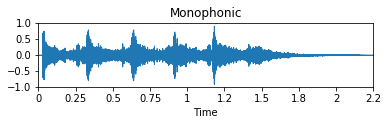

In [12]:
y, sr = librosa.load(('/home/monn/Sound-Data/fold1/7061-6-0-0.wav'), duration=10)
plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic')

Text(0.5,1,'Log-frequency power spectrogram')

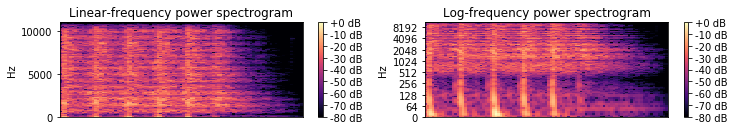

In [13]:
import matplotlib.pyplot as plt
y, sr = librosa.load('/home/monn/Sound-Data/fold1/7061-6-0-0.wav')
plt.figure(figsize=(12, 8))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

plt.subplot(4, 2, 2)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')